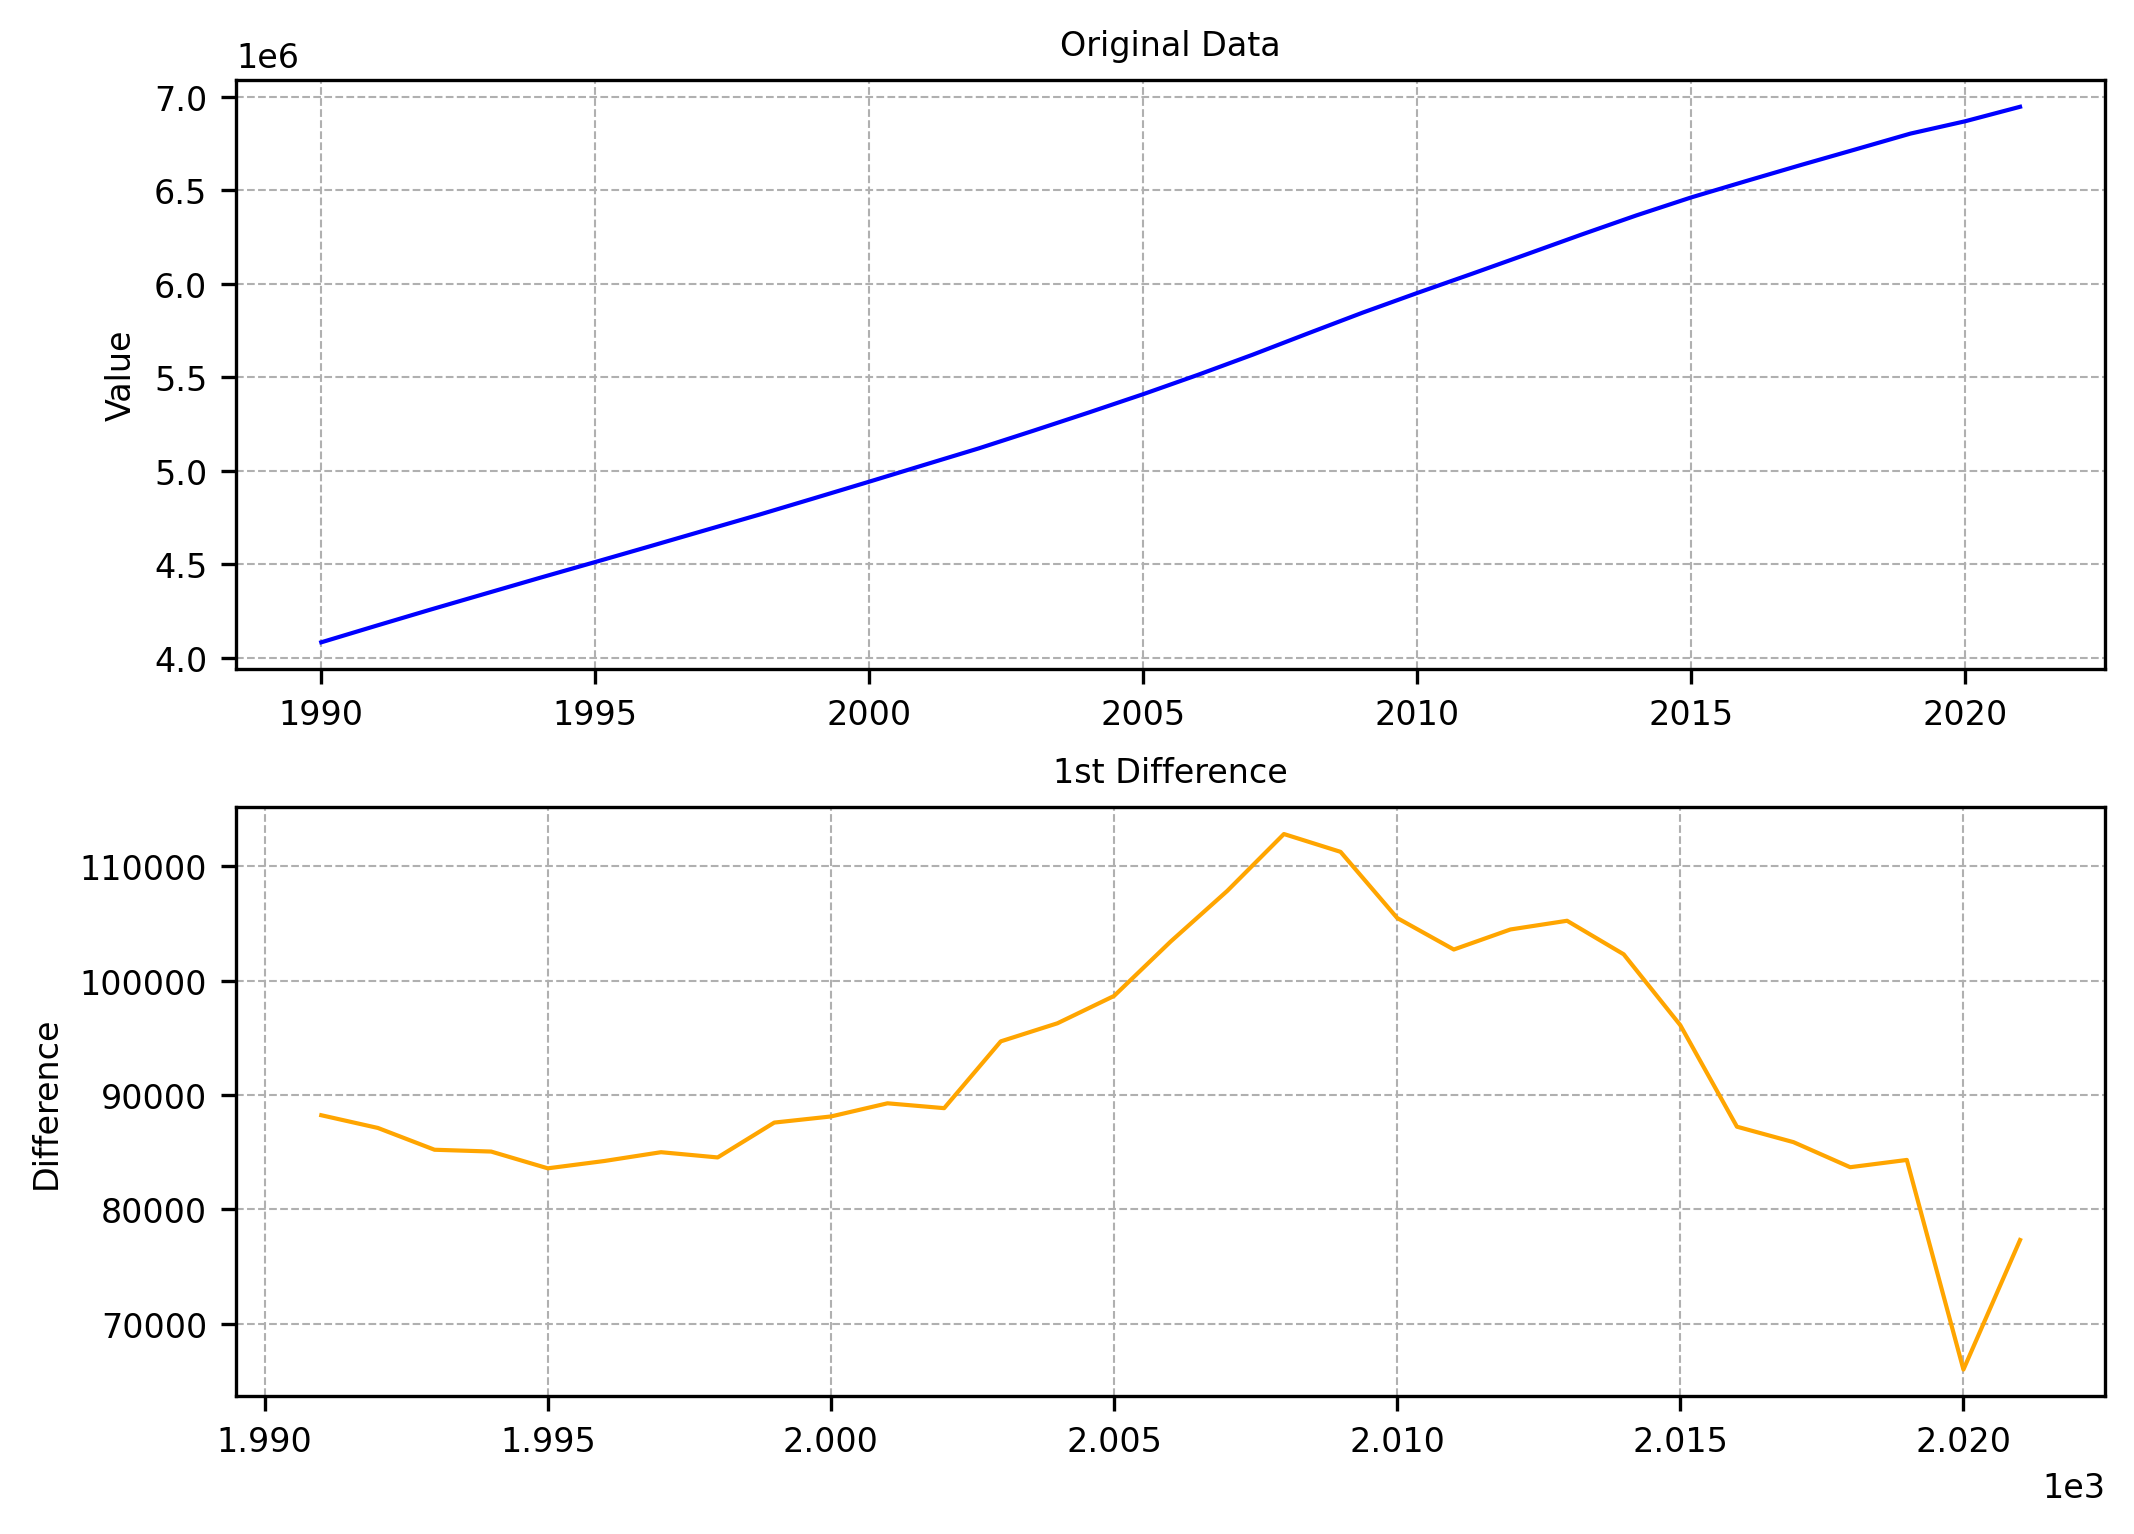

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]
sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')

# Compute the first difference
first_diff = df.val.diff().dropna()

# Plot the original data and first difference
plt.rcParams.update({'font.size': 8})  # Adjust font size for IEEE template
fig, axes = plt.subplots(2, 1, figsize=(7, 5), dpi=300, constrained_layout=True)

# Original data
axes[0].plot(df.index, df.val, color='blue', linewidth=1)
axes[0].set_title('Original Data', fontsize=8)
axes[0].set_ylabel('Value', fontsize=8)
axes[0].grid(True, linestyle='--', linewidth=0.5)

# First difference
axes[1].plot(first_diff.index, first_diff, color='orange', linewidth=1)
axes[1].set_title('1st Difference', fontsize=8)
axes[1].set_ylabel('Difference', fontsize=8)
axes[1].grid(True, linestyle='--', linewidth=0.5)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
# Save the figure
plt.savefig('original_and_first_difference.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


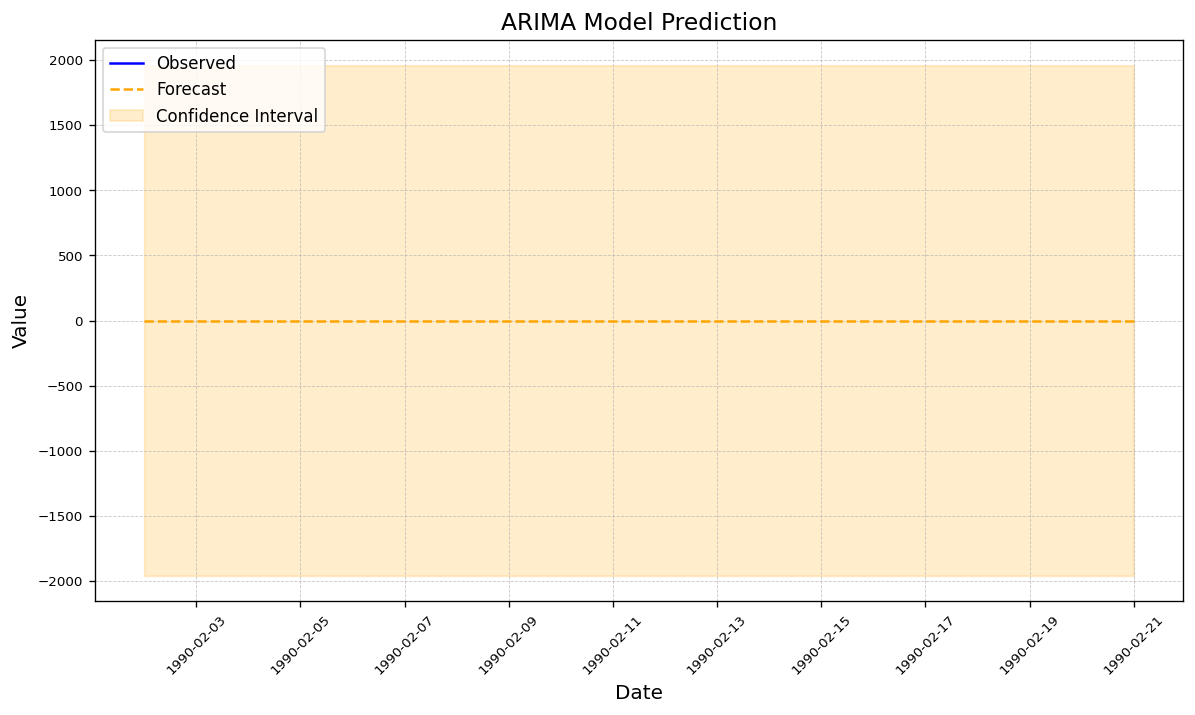

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Example data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]
sex_data = df[df['sex_id'] == 3][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
data = df.reset_index(drop=True)
time_series = pd.Series(data.val, index=pd.date_range(start='1990', periods=len(data)))

# Fit ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))
fitted_model = model.fit()

# Forecast future values
forecast_steps = 20
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=time_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Observed', color='blue', linewidth=1.5)
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange', linestyle='--', linewidth=1.5)
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')

# Add gridlines, labels, and title
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.title('ARIMA Model Prediction', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Customize legend
plt.legend(loc='upper left', fontsize=10, frameon=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout for better spacing
plt.tight_layout()

# Save the plot
plt.savefig('arima_forecast_customized.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

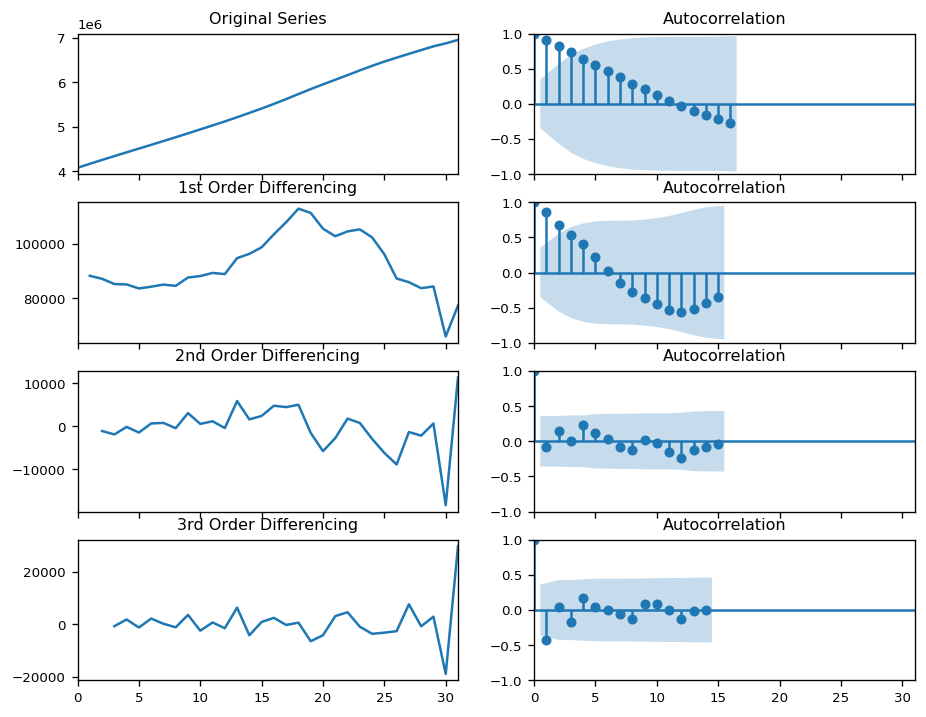

In [21]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
df = df.reset_index(drop=True)
# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.val); axes[0, 0].set_title('Original Series')
plot_acf(df.val, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.val.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.val.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.val.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.val.diff().diff().dropna(), ax=axes[2, 1])

# 3rd Differencing
axes[3, 0].plot(df.val.diff().diff().diff()); axes[3, 0].set_title('3rd Order Differencing')
plot_acf(df.val.diff().diff().diff().dropna(), ax=axes[3, 1])

axes[0, 0].set_xlim(df.index.min(), df.index.max())  # Set x-axis limits for all subplots
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
df = df.reset_index(drop=True)
# Compute the first difference of the series
first_diff = df.val.diff().dropna()

# Perform the ADF test
adf_result = adfuller(first_diff)

# Print the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if adf_result[1] < 0.05:
    print("The first difference is stationary (reject the null hypothesis).")
else:
    print("The first difference is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -2.939311457252405
p-value: 0.04096387855343094
Critical Values:
   1%: -3.7377092158564813
   5%: -2.9922162731481485
   10%: -2.635746736111111
The first difference is stationary (reject the null hypothesis).


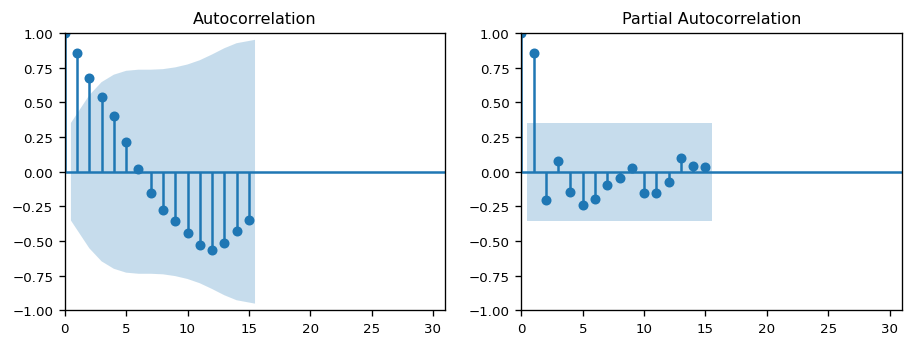

In [29]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].set(ylim=(0,1.2))
plot_acf(df.val.diff().dropna(), ax=axes[0])

axes[1].set(ylim=(0,5))
plot_pacf(df.val.diff().dropna(), ax=axes[1])
axes[0].set_xlim(df.index.min(), df.index.max())  # Set x-axis limits for all subplots
plt.show()

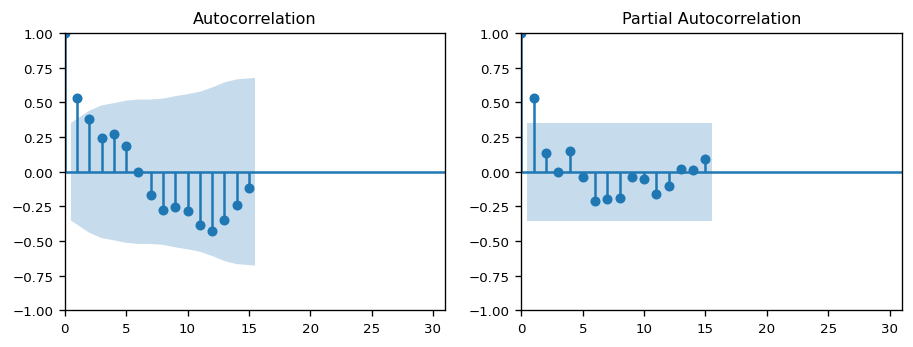

In [30]:
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
df = df.reset_index(drop=True)
# ACF and PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].set(ylim=(0,1.2))
plot_acf(df.val.diff().dropna(), ax=axes[0])

axes[1].set(ylim=(0,5))
plot_pacf(df.val.diff().dropna(), ax=axes[1])
axes[0].set_xlim(df.index.min(), df.index.max())  # Set x-axis limits for all subplots
plt.show()

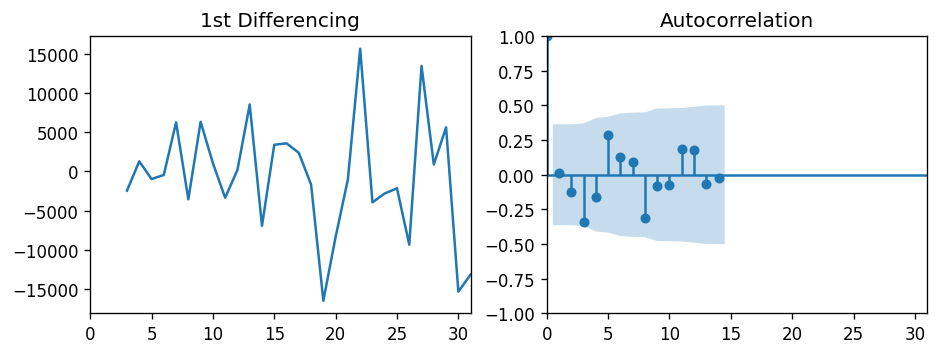

In [8]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.val.diff().diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.val.diff().diff().diff().dropna(), ax=axes[1])
axes[0].set_xlim(df.index.min(), df.index.max())  # Set x-axis limits for all subplots
plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-34.658, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-42.633, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-39.724, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-35.570, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-41.443, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-41.364, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-40.120, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-44.228, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-43.275, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-43.210, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-40.872, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-41.932, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.683 seconds
                               SARIMAX Results                                
Dep. Variable:       

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


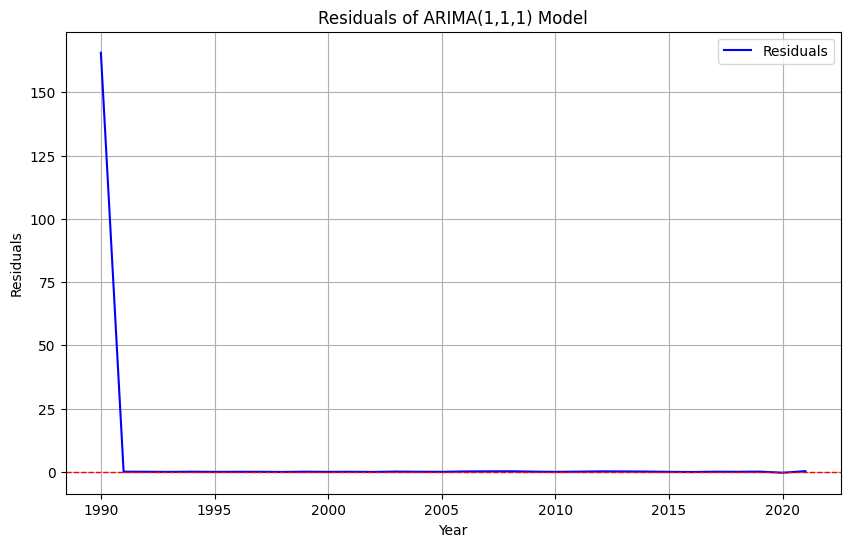

<Figure size 1000x600 with 0 Axes>

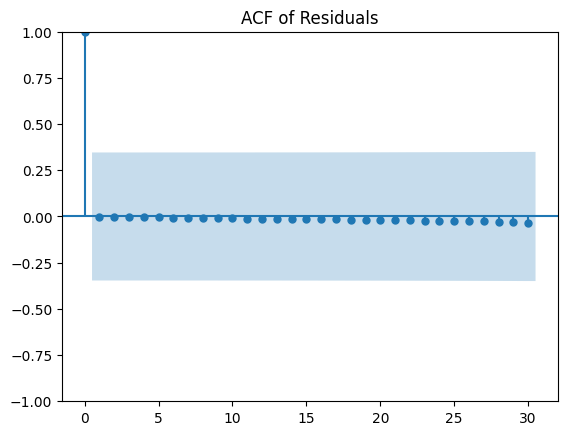

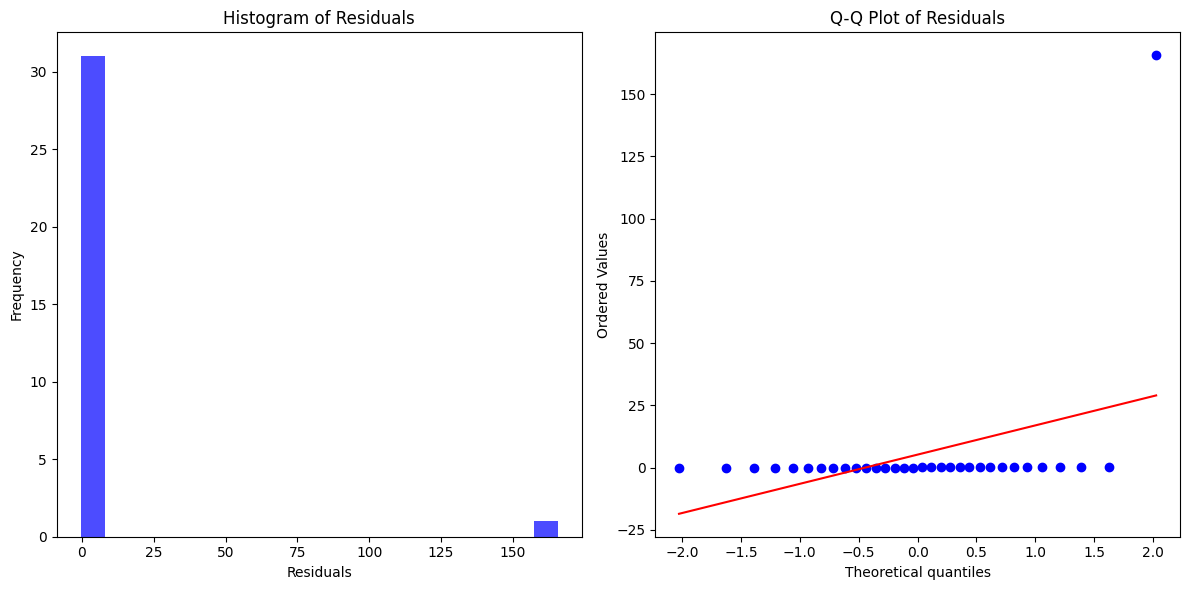

Residuals Summary Statistics:
count     32.000000
mean       5.188044
std       29.279346
min       -0.385941
25%       -0.038933
50%        0.007971
75%        0.074299
max      165.640000
dtype: float64


In [5]:
import pmdarima as pm
import pandas as pd
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] == 27]

sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
df = df.reset_index(drop=True)
model_auto = pm.auto_arima(df,
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           d=None,           # Automatically determine differencing
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

print(model_auto.summary())
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Filter and prepare the data
sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
sex_data = sex_data.set_index('year')

# Fit the ARIMA(1,1,1) model
model = ARIMA(sex_data['val'], order=(1, 1, 0))
model_fit = model.fit()

# Extract residuals
residuals = model_fit.resid

# Diagnostic Step 1: Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals of ARIMA(1,1,1) Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

# Diagnostic Step 2: ACF plot of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=30, title='ACF of Residuals')
plt.show()

# Diagnostic Step 3: Histogram and Q-Q plot of residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# Diagnostic Step 4: Summary statistics
print("Residuals Summary Statistics:")
print(residuals.describe())

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Future

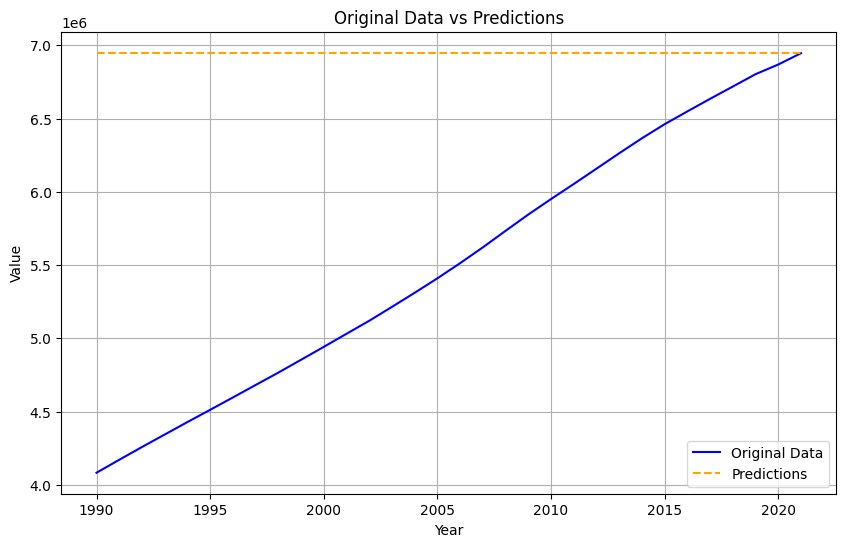

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

# Filter and prepare the data
sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
sex_data = sex_data.set_index('year')

# Fit the ARIMA(1,1,1) model
model = ARIMA(sex_data['val'], order=(1, 1, 0))
model_fit = model.fit()

# Generate predictions
start = sex_data.index[0]
end = sex_data.index[-1]
predictions = model_fit.predict(start=start, end=end, dynamic=False)

# Plot original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(sex_data.index, sex_data['val'], label='Original Data', color='blue')
plt.plot(predictions.index, predictions, label='Predictions', color='orange', linestyle='--')
plt.title('Original Data vs Predictions')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Outliers:
year
1990    165.64
dtype: float64


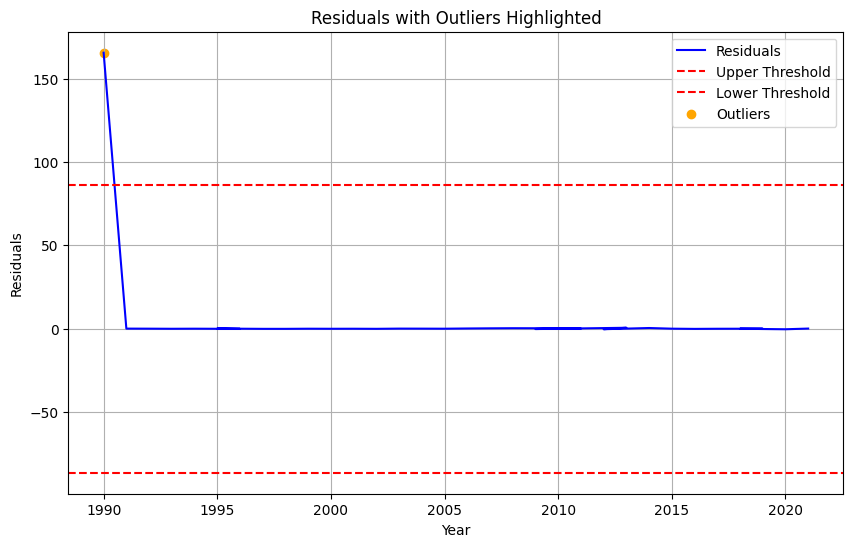

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]
sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.set_index('year')

# Fit ARIMA model
model = ARIMA(sex_data['val'], order=(1, 1, 1))
model_fit = model.fit()

# Extract residuals
residuals = model_fit.resid

# Identify outliers (e.g., residuals > 3 standard deviations)
threshold = 3 * np.std(residuals)
outliers = residuals[np.abs(residuals) > threshold]

print("Outliers:")
print(outliers)

# Plot residuals with outliers highlighted
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Upper Threshold')
plt.axhline(y=-threshold, color='red', linestyle='--', label='Lower Threshold')
plt.scatter(outliers.index, outliers, color='orange', label='Outliers')
plt.title('Residuals with Outliers Highlighted')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarn

Outliers:
year
1990    4083516.51
dtype: float64


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


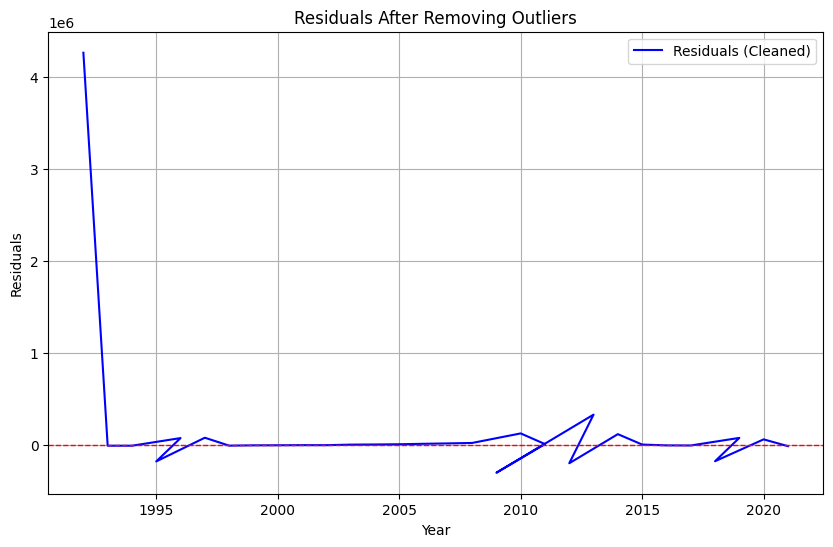

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]
sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.set_index('year')

# Fit ARIMA model
model = ARIMA(sex_data['val'], order=(1, 1, 1))
model_fit = model.fit()

# Extract residuals
residuals = model_fit.resid

# Identify outliers (e.g., residuals > 3 standard deviations)
threshold = 3 * np.std(residuals)
outliers = residuals[np.abs(residuals) > threshold]

print("Outliers:")
print(outliers)

# Remove outliers and refit the model
cleaned_data = sex_data[np.abs(residuals) <= threshold]
model_cleaned = ARIMA(cleaned_data['val'][1:], order=(1, 1, 1))
model_fit_cleaned = model_cleaned.fit()

# Plot residuals after removing outliers
residuals_cleaned = model_fit_cleaned.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals_cleaned, label='Residuals (Cleaned)', color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals After Removing Outliers')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
 from statsmodels.tsa.arima.model import ARIMA
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] == 27]

sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
df = df.reset_index(drop=True)
# 1,1,2 ARIMA Model
model = ARIMA(df.val, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    val   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  24.605
Date:                Wed, 11 Jun 2025   AIC                            -43.210
Time:                        08:29:09   BIC                            -38.908
Sample:                             0   HQIC                           -41.808
                                 - 32                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7625      0.268      2.841      0.004       0.236       1.289
ma.L1         -0.3437      0.327     -1.053      0.293      -0.984       0.296
sigma2         0.0118      0.002      6.112      0.0

In [10]:
model_fit.plot_predict(dynamic=False)
plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Minh\AppData\Local\Temp\ipykernel_30136\2131934648.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=df.index[-1] + 1, periods=10, freq='Y')  # Adjust frequency if needed


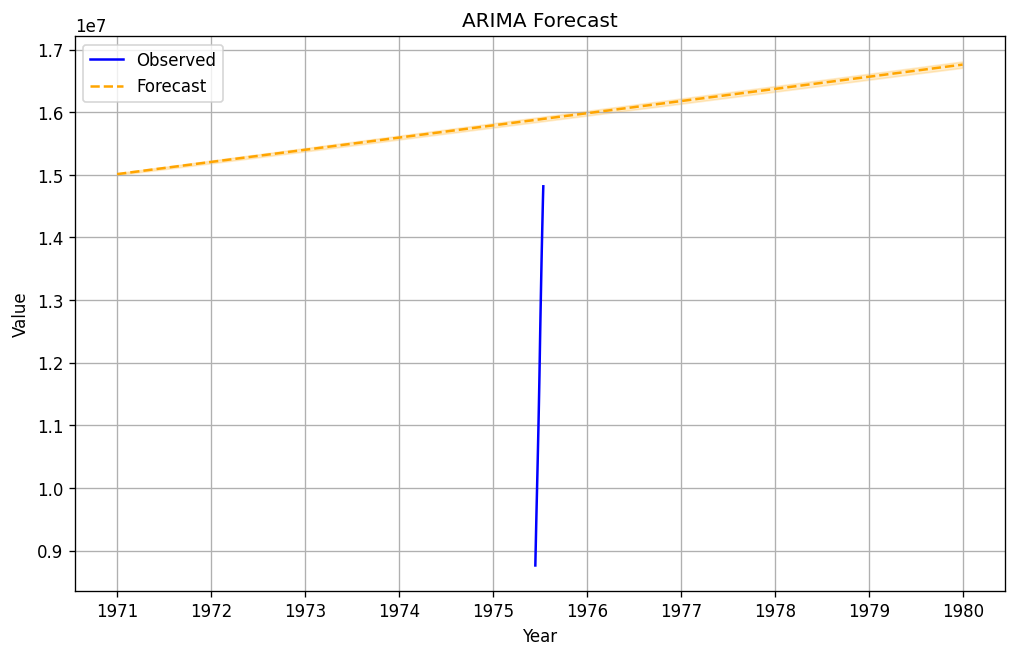

In [11]:
# Generate predictions
forecast = model_fit.get_forecast(steps=10)  # Adjust steps as needed
forecast_index = pd.date_range(start=df.index[-1] + 1, periods=10, freq='Y')  # Adjust frequency if needed
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df.val, label='Observed', color='blue')

# Plot the forecast
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange', linestyle='--')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2)

# Add labels and legend
plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


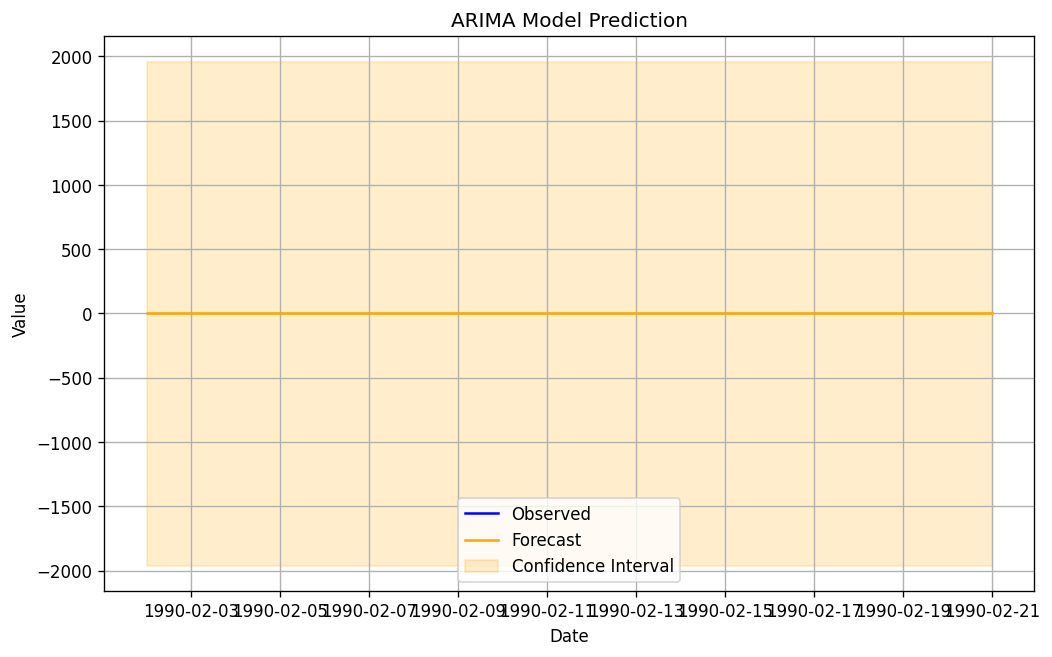

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Example data: Generate a simple time series
np.random.seed(42)
data = np.cumsum(np.random.randn(100))  # Cumulative sum of random values



file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 27]

sex_data = df[df['sex_id'] == 3][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
df = sex_data.set_index('year')
data = df.reset_index(drop=True)
time_series = pd.Series(data.val, index=pd.date_range(start='1990', periods=len(data)))



# Fit ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))  # ARIMA(p, d, q)
fitted_model = model.fit()

# Forecast future values
forecast_steps = 20
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=time_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
plt.title('ARIMA Model Prediction')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
M:\Code_Enviroments\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


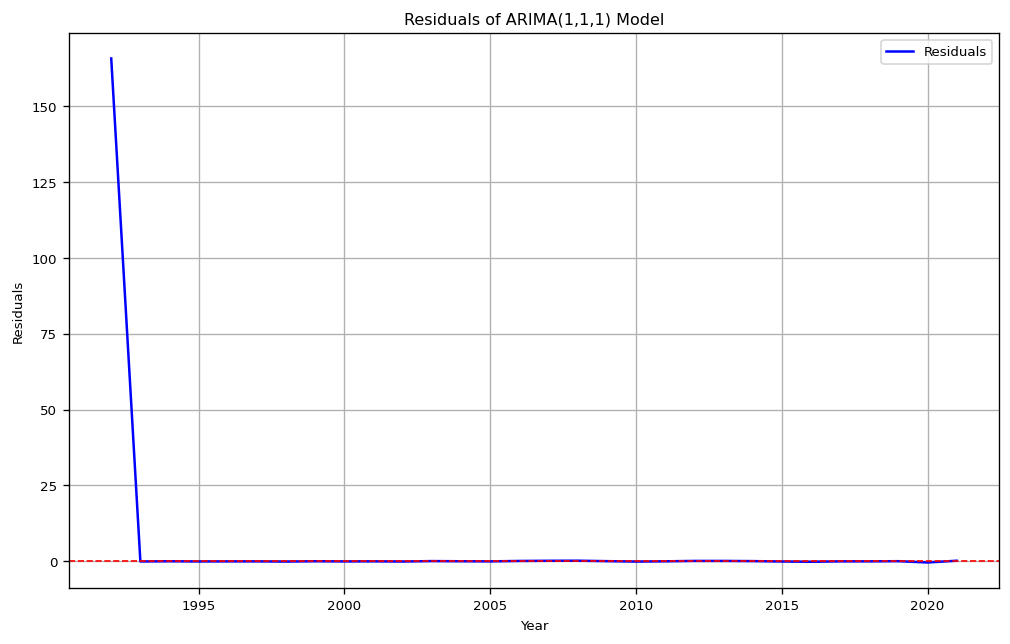

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
file_path = 'new_data_important/data_1990_2021.csv'
df = pd.read_csv(file_path)
df = df[df['age_id'] != 22]

# Filter and prepare the data
sex_data = df[df['sex_id'] == 2][['year', 'val']].dropna()
sex_data = sex_data.sort_values(by='year')
sex_data = sex_data.set_index('year')
# Fit the ARIMA(1,1,1) model
model = ARIMA(sex_data['val'], order=(1, 1, 1))
model_fit = model.fit()

# Extract residuals
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals of ARIMA(1,1,1) Model')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()